In [1]:
import pandas as pd
import numpy as np
import pywt
import matplotlib.pyplot as plt

In [2]:
# sampling rate
fs = 10000000 # 10MHz

# signal length
t = np.arange(0, 0.5, 1 / fs) # s, sampling interval, time array

# generate signal
f1 = 60 # 60Hz
signal_f = 2*np.sin(2*np.pi*f1*t)  # amplitude = 2

# generate noise signal
np.random.seed(222)
n1 = np.random.uniform(1000000, 1500000, len(t)) # 1MHz ~ 1.5 MHz
signal_n = 0.2*np.sin(2*np.pi*n1*t)

# total signal
normal_signal = signal_f + signal_n

#  generate noise Arc signal

n3 = 4000000 # 4MHz

np.random.seed(333)
random_mag_Arc = np.random.uniform(0.8, 1.1, 1500)
signal_Arc = random_mag_Arc*np.sin(2*np.pi*n3*t[82500:84000])

signal_Arc # 아크 신호

temp = list(normal_signal) # shoulder 범위만 아크 신호를 더해주기 위해 타입변환

# shoulder 범위만 아크 신호 더하고 shoulder 범위가 아닌 부분은 아크신호를 더하지 않음.

import random
num_s =[] # shoulder 부분 Counting 역할

i,j = 1, 0
s0 = temp[82500*0+1500*0:82500*1+1500*0]
end = (82500*1)+(1500*0)

while (len(s0) != 5000000):
    start = end
    np.random.seed(0)
    num = random.randint(0,2) # 아크 신호를 랜덤하기 더해주기 위한 규칙 생성
    num_s.append(num)
    
    if i == j: # shoulder 범위가 아닐때 그냥 신호 더해줌.
        i += 1
        end = (82500*i)+(1500*j)
        s0 = s0+temp[start:end]
    elif i!=j and num == 2: # shoulder 범위 이면서 num == 2일 경우 아크 신호 더함.
        j += 1
        end = (82500*i)+(1500*j)
        x = temp[start:end] + signal_Arc
        s0 = s0+ list(x) 
    else: # shoulder 범위 이나 num은 2가 아닐 경우 노말 신호만 더해줌.
        j += 1
        end = (82500*i)+(1500*j)
        s0 = s0+ temp[start:end] 
        
sig = np.array(s0) # numpy array type으로 변환

In [3]:
len(sig)

5000000

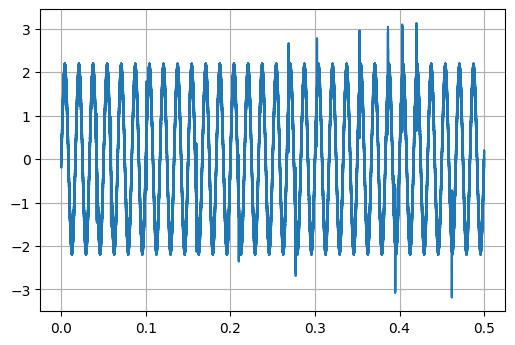

In [4]:
# visualizing signal (노말과 아크 상태를 추가하여 완성된 신호)

plt.figure(num = 1, dpi = 100)
plt.plot(t, sig)
plt.grid()

Satety
Safety
Satety
Safety
Safety
Safety
Safety
Safety
Satety
Safety
Satety
Safety
Safety
Safety
Safety
Satety
Safety
Satety
Safety
Satety
Safety
Satety
Safety
Satety
Safety
Satety
Safety
Safety
Safety
Satety
Safety
Satety
Safety
Satety
Safety
Satety
Safety
Safety
Safety
Satety
Safety
Safety
Satety
Safety
Satety
Safety
Satety
Safety
Satety
Safety
Satety
Safety
Safety
Caution!
Caution!
Safety
Caution!
Safety
Safety
Satety
Safety
Satety
Safety
Satety
Safety
Satety
Safety
Satety
Safety
Satety


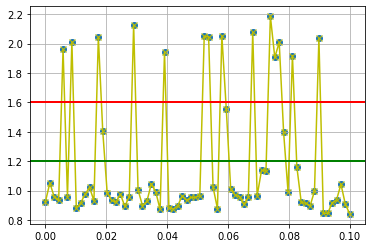

In [26]:
def unique(array):
    uniq, index = np.unique(array, return_index=True)
    return uniq[index.argsort()]


def WPT(signal):
    wp = pywt.WaveletPacket(data = signal, wavelet = 'db10', mode = 'symmetric')
    xx = wp['ddd'].data
    shift_size = 6000
    window_length = 12000
    ratio = []
    I_max = xx[:12000].max()
    
    for i in np.arange(0, len(xx), 6000):
        if len(ratio) < 104:
            window_2 = xx[i + shift_size: i + shift_size + window_length]

            I_n_max = window_2.max()

            I_ratio = I_n_max / I_max

            ratio.append(I_ratio)
            
    ratio= unique(ratio)
    tt = np.linspace(0, 0.1, len(ratio))
    
    plt.scatter(tt, ratio)
    plt.plot(tt, ratio, 'yx-')
    plt.axhline(y = 1.6, color = 'r', linewidth = 2)
    plt.axhline(y = 1.2, color = 'g', linewidth = 2)
    plt.grid()
    
    
    global count
    count = 0
    
    def state(count):
        if count > 2:
            print("Warning!")
        elif count > 1:
            print("Caution!")
        elif 0 <= count < 2:
            print("Safety")
        elif count < 0:
            count = 0
            print("Satety")
    
    for i in ratio:
        if i > 1.6:
            count += 1
            state(count)
        elif 1.2 < i < 1.6:
            state(count)
        else:
            if count < 0:
                count= 0
                state(count)
            else:
                count -= 1
                state(count)
    
WPT(sig)

## Extracted Signal

In [5]:
# test signal 1
test1 = sig[:1000000]

# test signal 2
test2 = sig[1000000:2000000]

# test signal 3
test3 = sig[2000000:3000000]


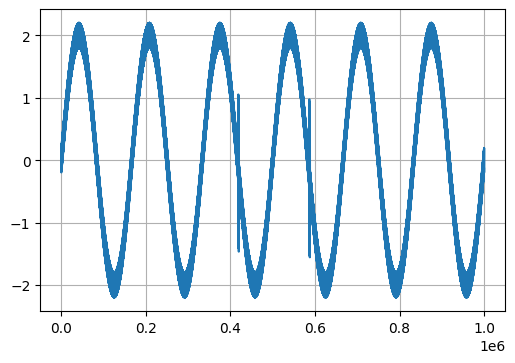

In [6]:
plt.figure(num = 1, dpi = 100)
plt.plot(test1)
plt.grid()

Satety
Safety
Satety
Safety
Safety
Safety
Safety
Safety
Satety
Safety
Satety
Safety
Satety


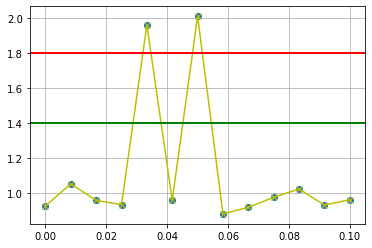

In [31]:
def unique(array):
    uniq, index = np.unique(array, return_index=True)
    return uniq[index.argsort()]


def WPT(signal):
    wp = pywt.WaveletPacket(data = signal, wavelet = 'db10', mode = 'symmetric')
    xx = wp['ddd'].data
    shift_size = 6000
    window_length = 12000
    ratio = []
    I_max = xx[:12000].max()
    
    for i in np.arange(0, len(xx), 6000):
        if len(ratio) < 20:
            window_2 = xx[i + shift_size: i + shift_size + window_length]

            I_n_max = window_2.max()

            I_ratio = I_n_max / I_max

            ratio.append(I_ratio)
            
    ratio= unique(ratio)
    tt = np.linspace(0, 0.1, len(ratio))
    
    plt.scatter(tt, ratio)
    plt.plot(tt, ratio, 'yx-')
    plt.axhline(y = 1.8, color = 'r', linewidth = 2)
    plt.axhline(y = 1.4, color = 'g', linewidth = 2)
    plt.grid()
    
    
    global count
    count = 0
    
    def state(count):
        if count > 2:
            print("Warning!")
        elif count > 1:
            print("Caution!")
        elif 0 <= count < 2:
            print("Safety")
        elif count < 0:
            count = 0
            print("Satety")
    
    for i in ratio:
        if i > 1.8:
            count += 1
            state(count)
        elif 1.4 < i < 1.8:
            state(count)
        else:
            if count < 0:
                count= 0
                state(count)
            else:
                count -= 1
                state(count)
    
WPT(test1)

# -------------------------------

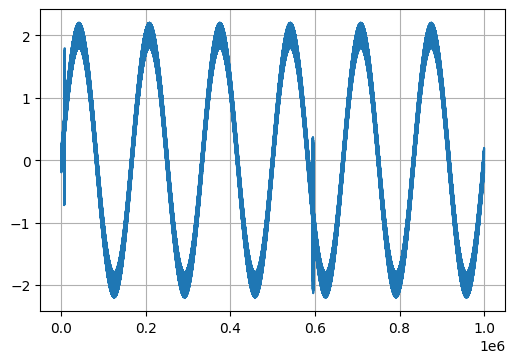

In [8]:
plt.figure(num = 1, dpi = 100)
plt.plot(test2)
plt.grid()

Satety
Safety
Satety
Safety
Satety
Safety
Safety
Safety
Satety
Safety
Satety
Safety
Satety


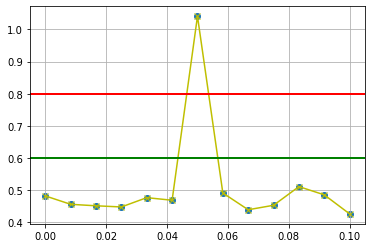

In [32]:
def unique(array):
    uniq, index = np.unique(array, return_index=True)
    return uniq[index.argsort()]


def WPT(signal):
    wp = pywt.WaveletPacket(data = signal, wavelet = 'db10', mode = 'symmetric')
    xx = wp['ddd'].data
    shift_size = 6000
    window_length = 12000
    ratio = []
    I_max = xx[:12000].max()
    
    for i in np.arange(0, len(xx), 6000):
        if len(ratio) < 20:
            window_2 = xx[i + shift_size: i + shift_size + window_length]

            I_n_max = window_2.max()

            I_ratio = I_n_max / I_max

            ratio.append(I_ratio)
            
    ratio= unique(ratio)
    tt = np.linspace(0, 0.1, len(ratio))
    
    plt.scatter(tt, ratio)
    plt.plot(tt, ratio, 'yx-')
    plt.axhline(y = 0.8, color = 'r', linewidth = 2)
    plt.axhline(y = 0.6, color = 'g', linewidth = 2)
    plt.grid()
    
    
    global count
    count = 0
    
    def state(count):
        if count > 2:
            print("Warning!")
        elif count > 1:
            print("Caution!")
        elif 0 <= count < 2:
            print("Safety")
        elif count < 0:
            count = 0
            print("Satety")
    
    for i in ratio:
        if i > 0.8:
            count += 1
            state(count)
        elif 0.6 < i < 0.8:
            state(count)
        else:
            if count < 0:
                count= 0
                state(count)
            else:
                count -= 1
                state(count)
    
WPT(test2)

## ------------------------------------------------

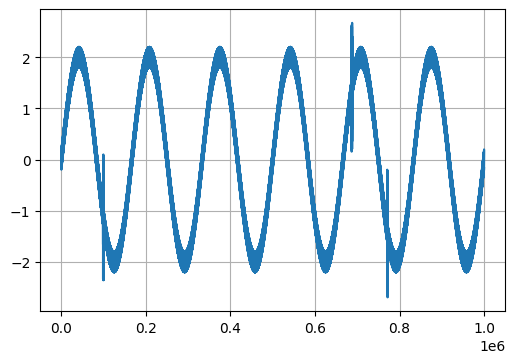

In [10]:
plt.figure(num = 1, dpi = 100)
plt.plot(test3)
plt.grid()

Safety
Safety
Satety
Safety
Satety
Safety
Satety
Safety
Safety
Caution!
Safety
Safety
Satety


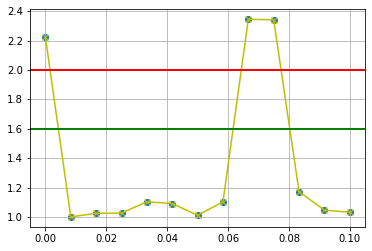

In [34]:
def unique(array):
    uniq, index = np.unique(array, return_index=True)
    return uniq[index.argsort()]


def WPT(signal):
    wp = pywt.WaveletPacket(data = signal, wavelet = 'db10', mode = 'symmetric')
    xx = wp['ddd'].data
    shift_size = 6000
    window_length = 12000
    ratio = []
    I_max = xx[:12000].max()
    
    for i in np.arange(0, len(xx), 6000):
        if len(ratio) < 20:
            window_2 = xx[i + shift_size: i + shift_size + window_length]

            I_n_max = window_2.max()

            I_ratio = I_n_max / I_max

            ratio.append(I_ratio)
            
    ratio= unique(ratio)
    tt = np.linspace(0, 0.1, len(ratio))
    
    plt.scatter(tt, ratio)
    plt.plot(tt, ratio, 'yx-')
    plt.axhline(y = 2.0, color = 'r', linewidth = 2)
    plt.axhline(y = 1.6, color = 'g', linewidth = 2)
    plt.grid()
    
    
    global count
    count = 0
    
    def state(count):
        if count > 2:
            print("Warning!")
        elif count > 1:
            print("Caution!")
        elif 0 <= count < 2:
            print("Safety")
        elif count < 0:
            count = 0
            print("Satety")
    
    for i in ratio:
        if i > 2.0:
            count += 1
            state(count)
        elif 1.6 < i < 2.0:
            state(count)
        else:
            if count < 0:
                count= 0
                state(count)
            else:
                count -= 1
                state(count)
    
WPT(test3)  